# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Lets write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin

**Note:** This is not financial advice.

Links:
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning


## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-30 19:58:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.05s   

2023-03-30 19:58:27 (3.27 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import pandas 
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a Datetime
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past 8 yeats but there's 2787 samples.

Typically models usually like lots of samples (lots can be thousands to tens of thousands to millions)

A smaller number of samples is something you'll often run into with time series data problems.

**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year.  So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


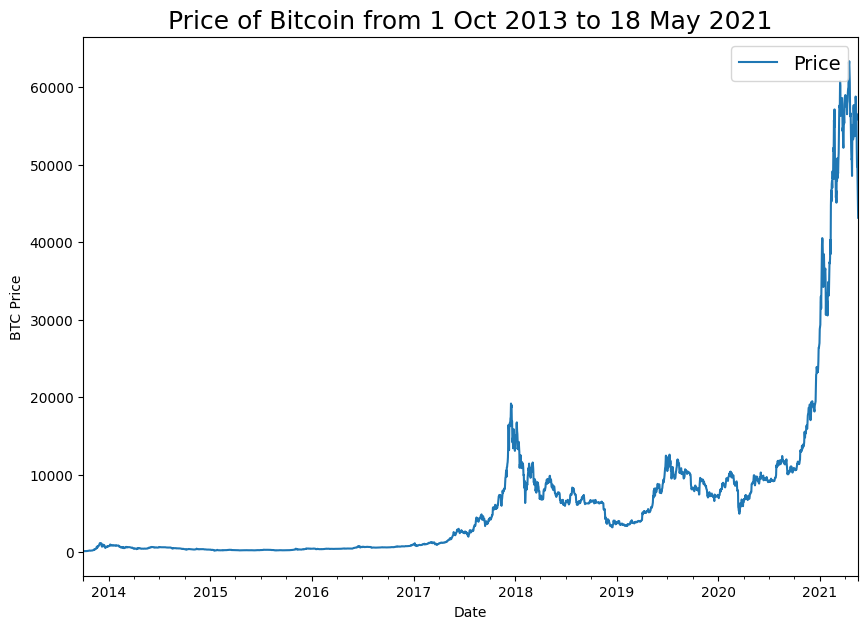

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=18)
plt.legend(fontsize=14);

## Importing time seires data with Python's CSV module

In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

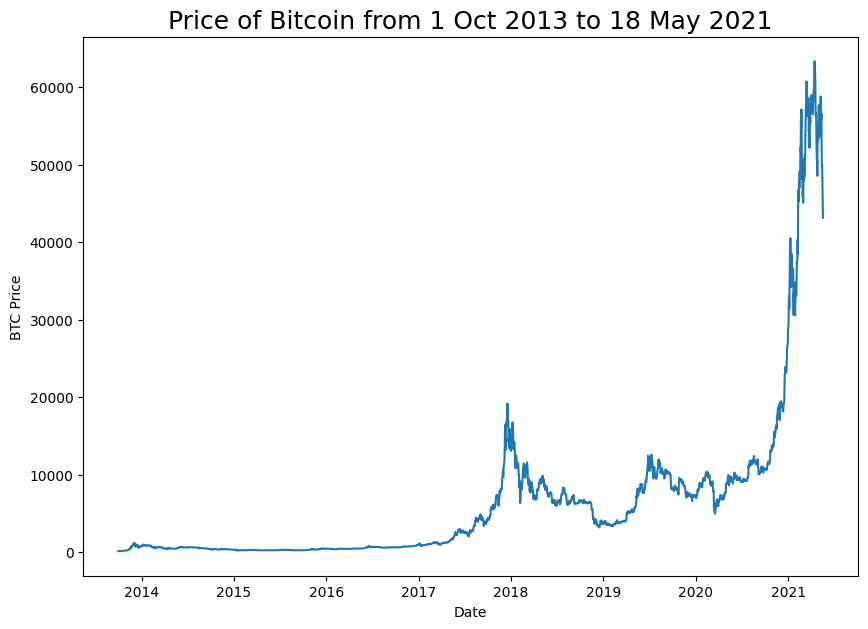

In [8]:
# Plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=18)

## Format data Part 1: Create train and test sets of our time series data

### Creating train and test sets with time seires data (the wrong way)

In [9]:
bitcoin_prices[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [10]:
# Get bitcoin date array 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, #dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

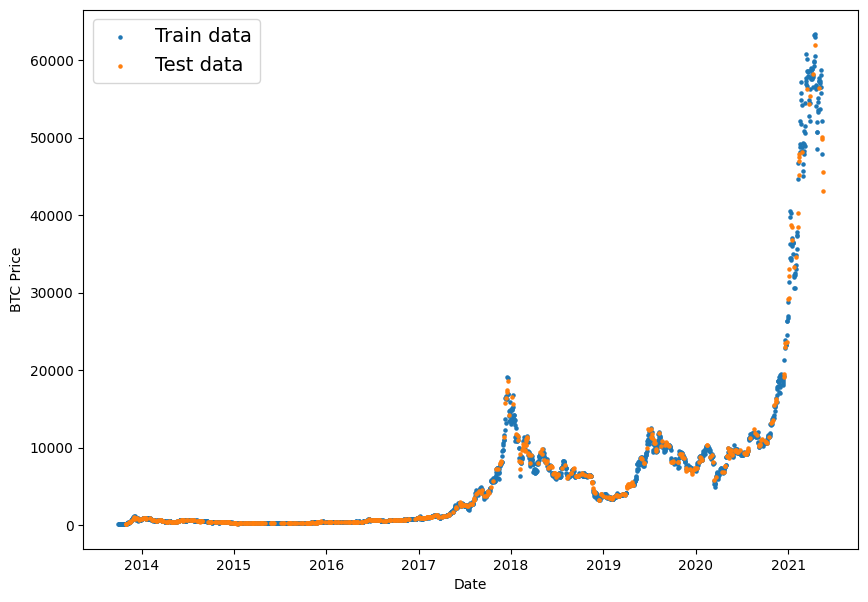

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating train and test sets with time seires data (the right way)

In [13]:
# Create train and test splits the right way for time seires data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

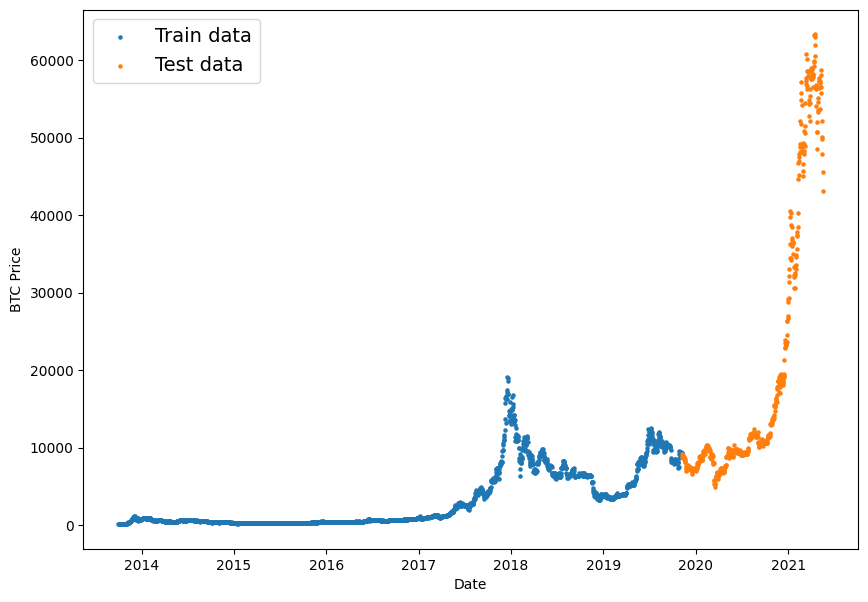

In [14]:
# Let's plot right train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionie it.

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a value will index from start of timesteps & values)
  end: where to end the plot (similar to start but for the end)
  label : label to show on plot and values
  """

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

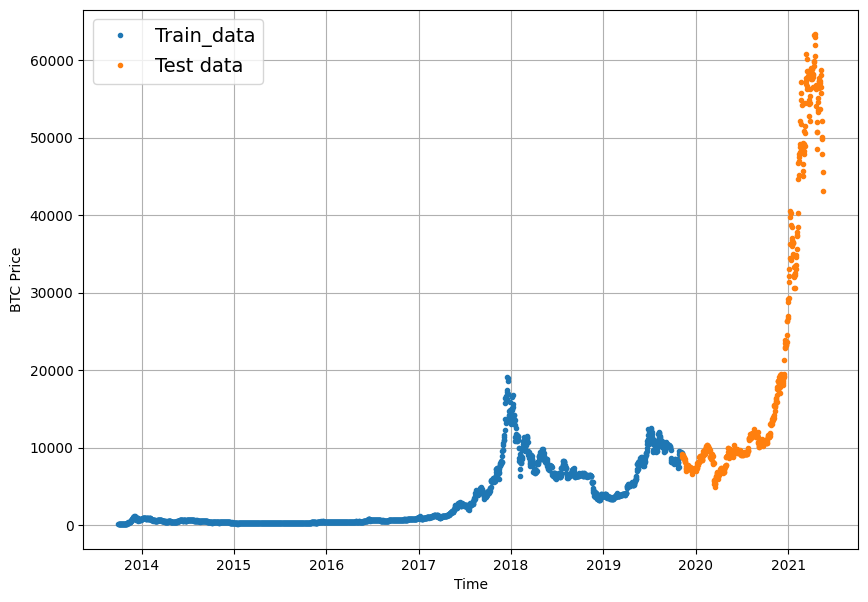

In [16]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train_data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoing historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments:
0. Naive Model (baseline)
1. Dense Model, horizon = 1, window = 7
2. Same as model 1, horizon = 1, window = 30
3. Same as model 1, horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as 1 (but with multivariate data)
7. N-Beats
8. Ensemble (multiple models optimized on different loss functions)
9. Future prediction model (model to predict future values)
10. Same as 1 (but with turkey data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}/_{t} = y_{t-1}$$

In English:
* The predicition at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [18]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [19]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

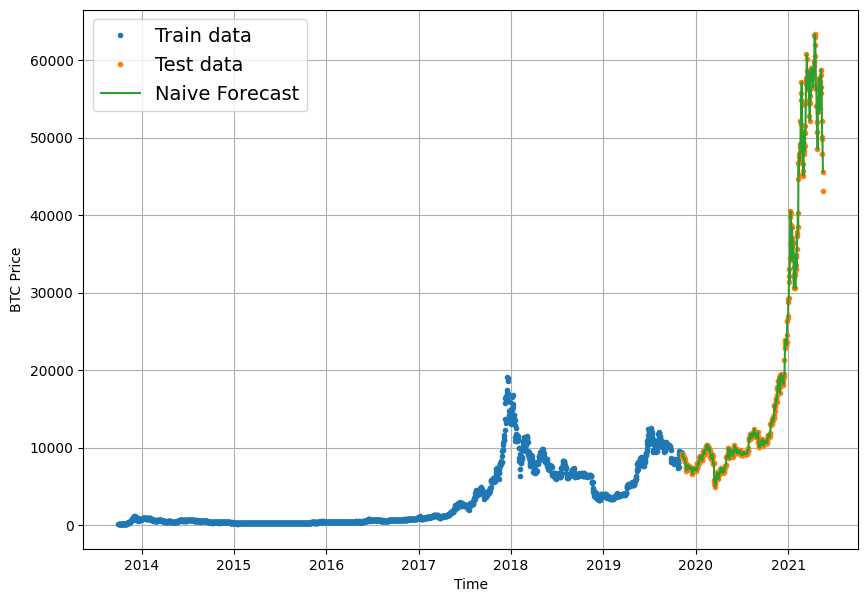

In [20]:
# Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")


Spend couple mins reading the simple forecasts chapter of Forecasting: Principles in Practice and have a search to find out why the naive forecast is hard to beat, does the term augoregressive come up?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a from of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error

The main things we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

For all of the above metrics, lower is better, for example, an MAE of 0 is better than an MAE of 100

In [21]:
import tensorflow as tf

In [22]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecase (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [23]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [24]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Let's see if the function works

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However, there are plenty of other styles of time series forecasting models you may want to experiment with.

## Format Data Pat 2: Windowing our datast

Wy do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [29]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [31]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6],  [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [32]:
# Test our the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, tha'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

```
[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]
```
3. Uses the 2D array of multipl window steps (from 2) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [33]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end of labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print[windowed_array]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [34]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

In [37]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  splits_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [39]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814, 8749.52059102],
        [8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ],
        [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
         8500.64355816, 8469.2608989 , 8537.33965197]]),
 array([[8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]))

In [42]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to wrte a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55

In [43]:
import os

# Create a function to implement a ModelCheckpointcallback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of tex,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and Relu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

Was picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themsleves
* **Parameters** = values a model learns on its own


In [44]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducable results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1054.1907 - mae: 1054.1907 - mse: 3768912.2500   

18/18 [==============================] - 9s 124ms/step - loss: 814.8323 - mae: 814.8323 - mse: 2594599.0000 - val_loss: 2182.9995 - val_mae: 2182.9995 - val_mse: 12172241.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 262.8623 - mae: 262.8623 - mse: 283148.1250

18/18 [==============================] - 1s 62ms/step - loss: 244.6321 - mae: 244.6321 - mse: 258157.5625 - val_loss: 1092.1801 - val_mae: 1092.1801 - val_mse: 3974124.5000
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 191.3967 - mae: 191.3967 - mse: 191836.2188

18/18 [==============================] - 1s 55ms/step - loss: 183.9921 - mae: 183.9921 - mse: 172148.7812 - val_loss: 982.6439 - val_mae: 982.6439 - val_mse: 3075956.2500
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 167.5939 - mae: 167.5939 - mse: 152128.6875

18/18 [==============================] - 1s 74ms/step - loss: 166.2795 - mae: 166.2795 - mse: 149444.5469 - val_loss: 888.3460 - val_mae: 888.3460 - val_mse: 2678243.7500
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 163.3829 - mae: 163.3829 - mse: 143181.1719

18/18 [==============================] - 1s 62ms/step - loss: 155.9617 - mae: 155.9617 - mse: 131337.1094 - val_loss: 883.4267 - val_mae: 883.4267 - val_mse: 2473751.7500
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 147.9681 - mae: 147.9681 - mse: 117788.1016

18/18 [==============================] - 1s 69ms/step - loss: 148.1434 - mae: 148.1434 - mse: 122159.3594 - val_loss: 809.9566 - val_mae: 809.9566 - val_mse: 2229505.5000
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 147.4853 - mae: 147.4853 - mse: 117085.0000 - val_loss: 811.3755 - val_mae: 811.3755 - val_mse: 2116055.5000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 138.6116 - mae: 138.6116 - mse: 108182.2969

18/18 [==============================] - 2s 146ms/step - loss: 138.4930 - mae: 138.4930 - mse: 107378.7812 - val_loss: 762.4135 - val_mae: 762.4135 - val_mse: 1948058.2500
Epoch 9/100
18/18 [==============================] - 0s 20ms/step - loss: 133.9186 - mae: 133.9186 - mse: 100086.3281 - val_loss: 807.1607 - val_mae: 807.1607 - val_mse: 1993016.8750
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 132.3735 - mae: 132.3735 - mse: 95497.0234

18/18 [==============================] - 3s 149ms/step - loss: 132.3735 - mae: 132.3735 - mse: 95497.0234 - val_loss: 715.2300 - val_mae: 715.2300 - val_mse: 1750029.8750
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 128.3245 - mae: 128.3245 - mse: 94570.1406

18/18 [==============================] - 1s 85ms/step - loss: 127.5866 - mae: 127.5866 - mse: 93482.7422 - val_loss: 702.5456 - val_mae: 702.5456 - val_mse: 1657333.3750
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 128.5582 - mae: 128.5582 - mse: 94832.7969

18/18 [==============================] - 1s 82ms/step - loss: 128.2980 - mae: 128.2980 - mse: 94011.7500 - val_loss: 684.2261 - val_mae: 684.2261 - val_mse: 1593296.2500
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 125.1829 - mae: 125.1829 - mse: 89130.8594 - val_loss: 719.5667 - val_mae: 719.5667 - val_mse: 1733205.2500
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 130.8456 - mae: 130.8456 - mse: 98413.6406

18/18 [==============================] - 1s 76ms/step - loss: 124.9235 - mae: 124.9235 - mse: 89497.6016 - val_loss: 663.4616 - val_mae: 663.4616 - val_mse: 1505204.5000
Epoch 15/100
18/18 [==============================] - 0s 8ms/step - loss: 122.7135 - mae: 122.7135 - mse: 85147.6094 - val_loss: 750.3430 - val_mae: 750.3430 - val_mse: 1711241.2500
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 123.9384 - mae: 123.9384 - mse: 82999.1875 - val_loss: 764.3709 - val_mae: 764.3709 - val_mse: 1742018.8750
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 127.6591 - mae: 127.6591 - mse: 87609.4688 - val_loss: 715.9531 - val_mae: 715.9531 - val_mse: 1599847.8750
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 117.1858 - mae: 117.1858 - mse: 81400.0469 - val_loss: 692.9626 - val_mae: 692.9626 - val_mse: 1529987.0000
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5496 - mae: 121.5496 - ms

18/18 [==============================] - 1s 67ms/step - loss: 121.6901 - mae: 121.6901 - mse: 84308.6953 - val_loss: 631.2997 - val_mae: 631.2997 - val_mse: 1383248.6250
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 119.1356 - mae: 119.1356 - mse: 82666.4297

18/18 [==============================] - 1s 66ms/step - loss: 119.3700 - mae: 119.3700 - mse: 80880.9375 - val_loss: 627.5408 - val_mae: 627.5408 - val_mse: 1369763.7500
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3174 - mae: 116.3174 - mse: 80296.2578 - val_loss: 628.2485 - val_mae: 628.2485 - val_mse: 1369354.5000
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3857 - mae: 114.3857 - mse: 78508.6562 - val_loss: 703.5554 - val_mae: 703.5554 - val_mse: 1537392.2500
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8802 - mae: 119.8802 - mse: 76779.7656 - val_loss: 702.8556 - val_mae: 702.8556 - val_mse: 1529410.5000
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5123 - mae: 118.5123 - mse: 76455.4922 - val_loss: 637.7510 - val_mae: 637.7510 - val_mse: 1368439.5000
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 117.2958 - mae: 117.2958 - mse: 

18/18 [==============================] - 1s 35ms/step - loss: 116.8122 - mae: 116.8122 - mse: 80256.7188 - val_loss: 623.6319 - val_mae: 623.6319 - val_mse: 1346154.1250
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2842 - mae: 112.2842 - mse: 75831.9688 - val_loss: 625.9464 - val_mae: 625.9464 - val_mse: 1351406.7500
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7780 - mae: 112.7780 - mse: 76931.1641 - val_loss: 663.7352 - val_mae: 663.7352 - val_mse: 1419196.0000
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 105.3020 - mae: 105.3020 - mse: 57721.8281

18/18 [==============================] - 1s 36ms/step - loss: 114.7109 - mae: 114.7109 - mse: 75320.7031 - val_loss: 605.9417 - val_mae: 605.9417 - val_mse: 1293019.2500
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9720 - mae: 111.9720 - mse: 75957.6172 - val_loss: 609.6443 - val_mae: 609.6443 - val_mse: 1294734.3750
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1247 - mae: 111.1247 - mse: 74021.8672 - val_loss: 632.3438 - val_mae: 632.3438 - val_mse: 1341944.0000
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7258 - mae: 118.7258 - mse: 75983.2734 - val_loss: 612.2689 - val_mae: 612.2689 - val_mse: 1307664.6250
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0166 - mae: 111.0166 - mse: 74289.1406 - val_loss: 606.5708 - val_mae: 606.5708 - val_mse: 1281694.3750
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5338 - mae: 111.5338 - m

18/18 [==============================] - 1s 49ms/step - loss: 114.0089 - mae: 114.0089 - mse: 76037.8906 - val_loss: 596.1262 - val_mae: 596.1262 - val_mse: 1261123.5000
Epoch 37/100
18/18 [==============================] - 0s 11ms/step - loss: 111.3707 - mae: 111.3707 - mse: 74045.2891 - val_loss: 656.5573 - val_mae: 656.5573 - val_mse: 1414987.1250
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 113.6748 - mae: 113.6748 - mse: 74251.5938 - val_loss: 671.3884 - val_mae: 671.3884 - val_mse: 1413530.0000
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0332 - mae: 111.0332 - mse: 72823.1641 - val_loss: 611.9798 - val_mae: 611.9798 - val_mse: 1296721.3750
Epoch 40/100
10/18 [===============>..............] - ETA: 0s - loss: 103.9312 - mae: 103.9312 - mse: 60783.3867

18/18 [==============================] - 1s 53ms/step - loss: 110.0362 - mae: 110.0362 - mse: 72266.1250 - val_loss: 593.0447 - val_mae: 593.0447 - val_mse: 1247567.1250
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1214 - mae: 111.1214 - mse: 74311.0703 - val_loss: 665.3127 - val_mae: 665.3127 - val_mse: 1433871.5000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8218 - mae: 108.8218 - mse: 71769.8984 - val_loss: 593.6313 - val_mae: 593.6313 - val_mse: 1245626.2500
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2073 - mae: 112.2073 - mse: 71606.6875 

18/18 [==============================] - 1s 36ms/step - loss: 112.9877 - mae: 112.9877 - mse: 71854.0156 - val_loss: 587.8278 - val_mae: 587.8278 - val_mse: 1231436.0000
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 118.6989 - mae: 118.6989 - mse: 77325.7734 - val_loss: 681.7111 - val_mae: 681.7111 - val_mse: 1430111.2500
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 114.5167 - mae: 114.5167 - mse: 74820.6172

18/18 [==============================] - 1s 36ms/step - loss: 114.1547 - mae: 114.1547 - mse: 74150.5703 - val_loss: 586.4232 - val_mae: 586.4232 - val_mse: 1226220.3750
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2999 - mae: 109.2999 - mse: 71677.1250 - val_loss: 588.2119 - val_mae: 588.2119 - val_mse: 1229705.7500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3823 - mae: 107.3823 - mse: 71705.3828 - val_loss: 586.5823 - val_mae: 586.5823 - val_mse: 1223781.7500
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0205 - mae: 108.0205 - mse: 70874.2109 - val_loss: 606.8134 - val_mae: 606.8134 - val_mse: 1258817.0000
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0263 - mae: 112.0263 - mse: 72898.5938 - val_loss: 707.8306 - val_mae: 707.8306 - val_mse: 1491028.1250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4538 - mae: 115.4538 - m

18/18 [==============================] - 1s 36ms/step - loss: 109.7665 - mae: 109.7665 - mse: 71123.3906 - val_loss: 582.7725 - val_mae: 582.7725 - val_mse: 1211768.3750
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7229 - mae: 108.7229 - mse: 69258.4844 - val_loss: 613.2428 - val_mae: 613.2428 - val_mse: 1285686.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4183 - mae: 110.4183 - mse: 71234.7656 - val_loss: 595.9017 - val_mae: 595.9017 - val_mse: 1230903.3750
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7109 - mae: 108.7109 - mse: 68163.1562 - val_loss: 632.4499 - val_mae: 632.4499 - val_mse: 1331501.0000
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1926 - mae: 107.1926 - mse: 69294.0469 - val_loss: 591.2133 - val_mae: 591.2133 - val_mse: 1223204.5000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2604 - mae: 107.2604 - m

18/18 [==============================] - 1s 34ms/step - loss: 106.2999 - mae: 106.2999 - mse: 68900.7188 - val_loss: 582.0488 - val_mae: 582.0488 - val_mse: 1210544.3750
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7846 - mae: 110.7846 - mse: 70616.5312 - val_loss: 598.5975 - val_mae: 598.5975 - val_mse: 1233548.1250
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4159 - mae: 109.4159 - mse: 69089.9062 - val_loss: 614.1469 - val_mae: 614.1469 - val_mse: 1264769.6250
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6876 - mae: 108.6876 - mse: 69656.9453 - val_loss: 642.7980 - val_mae: 642.7980 - val_mse: 1326636.6250
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2566 - mae: 122.2566 - mse: 78405.5312 - val_loss: 663.3484 - val_mae: 663.3484 - val_mse: 1378660.2500
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 120.0413 - mae: 120.0413 - m

18/18 [==============================] - 1s 34ms/step - loss: 110.8565 - mae: 110.8565 - mse: 70998.2734 - val_loss: 580.1417 - val_mae: 580.1417 - val_mse: 1199224.8750
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8941 - mae: 107.8941 - mse: 68172.7344 - val_loss: 633.1543 - val_mae: 633.1543 - val_mse: 1323293.3750
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5544 - mae: 108.5544 - mse: 70014.9453 - val_loss: 580.4218 - val_mae: 580.4218 - val_mse: 1194631.8750
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 108.4674 - mae: 108.4674 - mse: 69223.2109

18/18 [==============================] - 1s 50ms/step - loss: 109.0957 - mae: 109.0957 - mse: 69475.1875 - val_loss: 578.4037 - val_mae: 578.4037 - val_mse: 1192215.5000
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1175 - mae: 109.1175 - mse: 70839.5938 - val_loss: 597.2853 - val_mae: 597.2853 - val_mse: 1237329.8750
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 106.3369 - mae: 106.3369 - mse: 69572.3125 - val_loss: 582.4686 - val_mae: 582.4686 - val_mse: 1195446.0000
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 107.6083 - mae: 107.6083 - mse: 70135.4453

18/18 [==============================] - 1s 35ms/step - loss: 107.6083 - mae: 107.6083 - mse: 70135.4453 - val_loss: 577.7000 - val_mae: 577.7000 - val_mse: 1189207.1250
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8511 - mae: 107.8511 - mse: 69872.9844 - val_loss: 580.5567 - val_mae: 580.5567 - val_mse: 1201945.5000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8746 - mae: 109.8746 - mse: 69086.2734 - val_loss: 709.4357 - val_mae: 709.4357 - val_mse: 1519483.2500
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2096 - mae: 109.2096 - mse: 69998.9297 - val_loss: 586.6470 - val_mae: 586.6470 - val_mse: 1197580.3750
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7130 - mae: 111.7130 - mse: 71709.5078 - val_loss: 645.6661 - val_mae: 645.6661 - val_mse: 1350713.7500
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9474 - mae: 113.9474 - m

18/18 [==============================] - 1s 35ms/step - loss: 106.0435 - mae: 106.0435 - mse: 68795.4062 - val_loss: 577.6519 - val_mae: 577.6519 - val_mse: 1189635.8750
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1811 - mae: 108.1811 - mse: 69409.2969 - val_loss: 746.7263 - val_mae: 746.7263 - val_mse: 1591025.3750
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9088 - mae: 126.9088 - mse: 114133.1328

18/18 [==============================] - 1s 33ms/step - loss: 117.2896 - mae: 117.2896 - mse: 74640.4141 - val_loss: 577.4823 - val_mae: 577.4823 - val_mse: 1190862.7500
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 105.5699 - mae: 105.5699 - mse: 69260.9297 - val_loss: 601.0414 - val_mae: 601.0414 - val_mse: 1224041.7500
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4708 - mae: 107.4708 - mse: 69057.8438 - val_loss: 580.2758 - val_mae: 580.2758 - val_mse: 1184421.1250
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4090 - mae: 108.4090 - mse: 69560.7266 - val_loss: 593.3945 - val_mae: 593.3945 - val_mse: 1206973.5000
Epoch 88/100
18/18 [==============================] - 0s 11ms/step - loss: 106.1627 - mae: 106.1627 - mse: 67228.3984 - val_loss: 637.4992 - val_mae: 637.4992 - val_mse: 1325746.1250
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 107.1899 - mae: 107.1899 - 

18/18 [==============================] - 1s 49ms/step - loss: 108.0942 - mae: 108.0942 - mse: 70233.4141 - val_loss: 576.1151 - val_mae: 576.1151 - val_mse: 1182530.5000
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 105.1004 - mae: 105.1004 - mse: 67195.2188 - val_loss: 617.6794 - val_mae: 617.6794 - val_mse: 1281485.6250
Epoch 92/100
11/18 [=================>............] - ETA: 0s - loss: 108.4719 - mae: 108.4719 - mse: 72295.5234

18/18 [==============================] - 1s 50ms/step - loss: 106.2610 - mae: 106.2610 - mse: 67690.0938 - val_loss: 575.9095 - val_mae: 575.9095 - val_mse: 1183567.5000
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 104.7823 - mae: 104.7823 - mse: 68164.7109 - val_loss: 605.4037 - val_mae: 605.4037 - val_mse: 1251334.2500
Epoch 94/100
12/18 [===================>..........] - ETA: 0s - loss: 104.1985 - mae: 104.1985 - mse: 60552.8477 

18/18 [==============================] - 1s 39ms/step - loss: 107.9841 - mae: 107.9841 - mse: 70528.9688 - val_loss: 573.2642 - val_mae: 573.2642 - val_mse: 1170901.0000
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8438 - mae: 104.8438 - mse: 67978.2188 - val_loss: 582.8657 - val_mae: 582.8657 - val_mse: 1185100.6250
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1659 - mae: 114.1659 - mse: 69494.9609 - val_loss: 655.4031 - val_mae: 655.4031 - val_mse: 1379487.6250
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5031 - mae: 108.5031 - mse: 70974.1016 - val_loss: 580.0109 - val_mae: 580.0109 - val_mse: 1188478.0000
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7141 - mae: 106.7141 - mse: 68687.9531 - val_loss: 580.1447 - val_mae: 580.1447 - val_mse: 1190632.8750
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 105.4917 - mae: 105.4917 - m

In [45]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 695.0830 - mae: 695.0830 - mse: 1473856.6250


[695.0830078125, 695.0830078125, 1473856.625]

In [46]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.2642 - mae: 573.2642 - mse: 1170900.5000


[573.2642211914062, 573.2642211914062, 1170900.5]

## Making forecast with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [47]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [48]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8757.45 , 8666.047, 8500.392, 8447.048, 8525.693, 8239.47 ,
        8077.683, 8062.702, 7664.009, 7289.369], dtype=float32)>)

In [49]:
test_labels.shape, model_1_preds.shape

((551, 1), TensorShape([551]))

In [50]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

In [51]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [52]:
X_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [53]:
test_windows[:5]

array([[9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102],
       [8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
        8760.89271814, 8749.52059102, 8656.97092235],
       [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102, 8656.97092235, 8500.64355816],
       [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
        8656.97092235, 8500.64355816, 8469.2608989 ],
       [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 , 8537.33965197]])

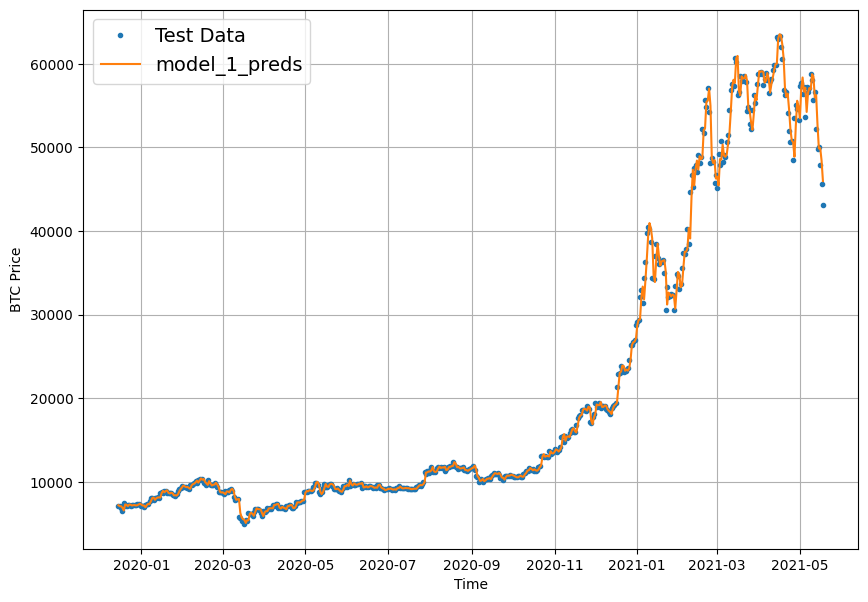

In [54]:
# Let's plot our model 1 predictions
offset = 30
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [55]:
HORIZON = 1 # predict one step at a time (one dat of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [56]:
# Make window data wih appropriate horizon and windowsizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [57]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                  labels=full_labels,
                                                                  test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [58]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [59]:
tf.random.set_seed(42)

# 1. Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_2_dense") # name our model so we can save it

# 2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [60]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 668.4023


668.4022827148438

In [61]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 642.6390


642.6390380859375

In [62]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [63]:
test_labels.shape, model_2_preds.shape

((528, 1), TensorShape([528]))

In [64]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 642.63904,
 'mse': 1395454.1,
 'rmse': 1181.2933,
 'mape': 2.7875853,
 'mase': 1.0877162}

In [65]:
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

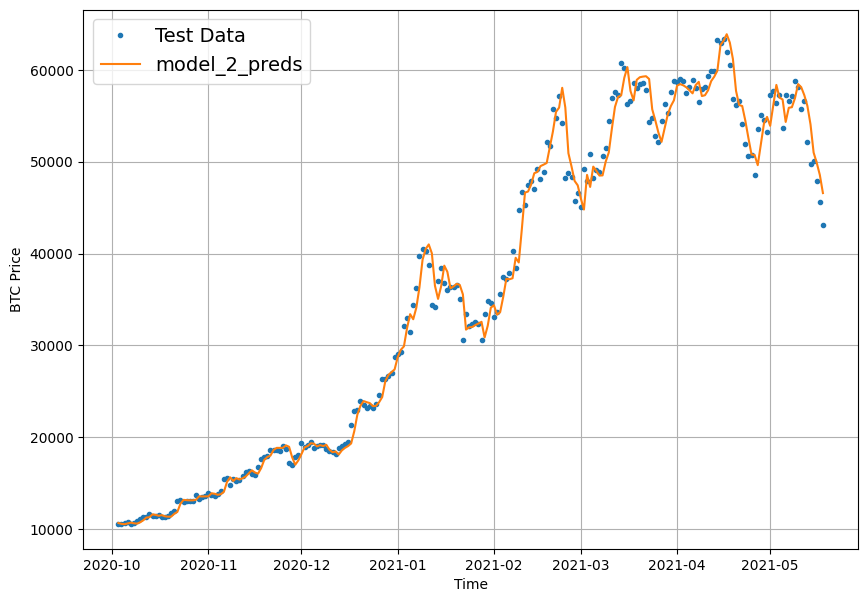

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [67]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [69]:
tf.random.set_seed(42)

# Create model (same as model_1) except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [70]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 4ms/step - loss: 1433.9557


1433.9556884765625

In [71]:
# Load best bersion of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1300.1427


1300.1427001953125

In [72]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

17/17 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[7436.178 , 7393.8535, 7371.884 , 7367.6   , 7367.9976, 7638.774 ,
        7389.0547],
       [7430.5225, 7418.7773, 7465.184 , 7519.4756, 7487.322 , 7616.5303,
        7530.3364],
       [7465.0376, 7544.357 , 7611.367 , 7530.537 , 7526.3076, 7651.1426,
        7583.978 ],
       [7325.969 , 7303.9004, 7337.9575, 7455.8257, 7470.2583, 7464.5444,
        7439.8164],
       [7125.299 , 7130.7354, 7205.537 , 7256.5312, 7393.397 , 7452.185 ,
        7384.309 ]], dtype=float32)>

In [73]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  169.65262 ,   267.1778  ,   358.9854  ,   264.00607 ,
          283.54047 ,   252.96199 ,   191.25809 ,   241.11342 ,
          215.8794  ,   210.44545 ,   320.18637 ,   595.5879  ,
          213.18367 ,   238.4608  ,   128.6884  ,    48.120537,
           68.852745,    61.58182 ,    42.5189  ,    77.737236,
          166.12723 ,   115.88574 ,   107.47279 ,   131.28947 ,
          150.14432 ,   234.5498  ,   390.46066 ,   591.0132  ,
          504.80963 ,   607.17786 ,   668.4081  ,   459.09857 ,
          311.98257 ,   299.3566  ,   428.74588 ,   497.87717 ,
          606.1817  ,   474.63297 ,   599.92267 ,   218.131   ,
          179.92508 ,   240.20787 ,   422.7934  ,   450.7736  ,
          419.881   ,   295.89594 ,   250.10686 ,   310.0173  ,
          369.8584  ,   560.29913 ,   833.03485 ,   843.8405  ,
          733.3472  ,   471.7984  ,   286.321   ,   154.96233 ,
          162.46135 ,   219.10979 ,   295.90723 ,   437.90723 ,
          662.1849  ,   606.6158 

## Make or evaluation function work for larger horizons

In [74]:
model_3_results["mae"].ndim

1

In [75]:
model_2_results["mae"].ndim

0

In [76]:
# Create a function to take in model predictions and truth balues and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [77]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                         y_pred=model_3_preds)
model_3_results

{'mae': 1300.1427,
 'mse': 5708231.5,
 'rmse': 1488.3723,
 'mape': 5.6120353,
 'mase': 2.222975}

we've made and evaluated predictions with model_3, let's visualize, visualize, visualize!

In [78]:
X_test[-len(test_windows):].shape

(522,)

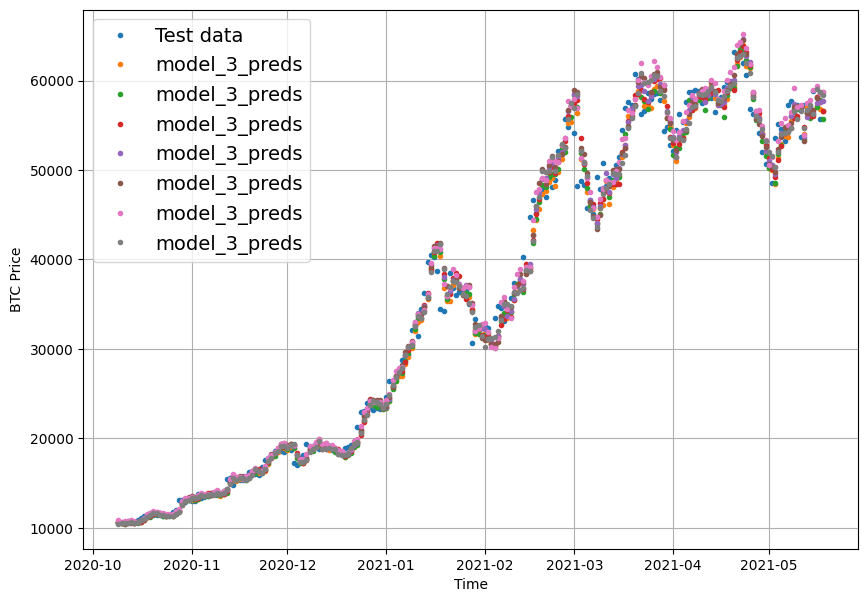

In [79]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

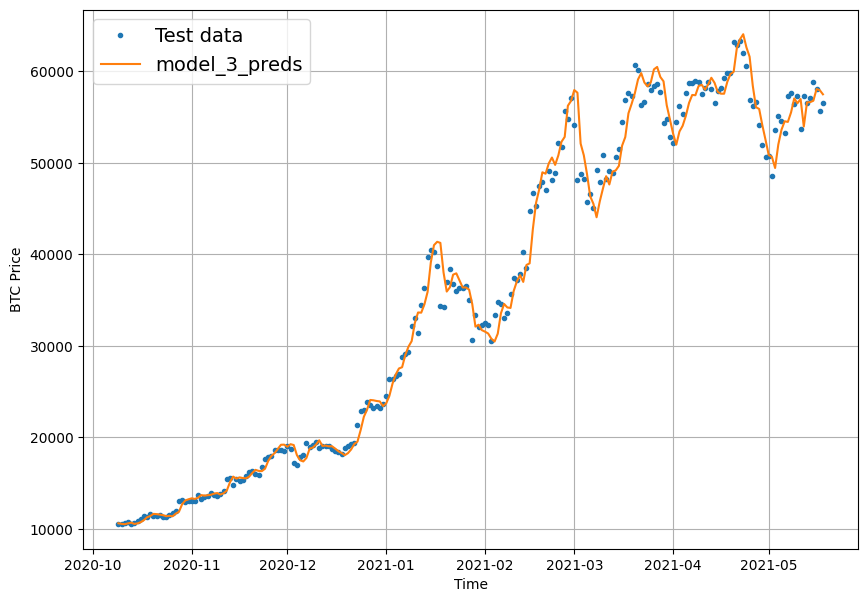

In [80]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

## Which of our models is perfroming the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

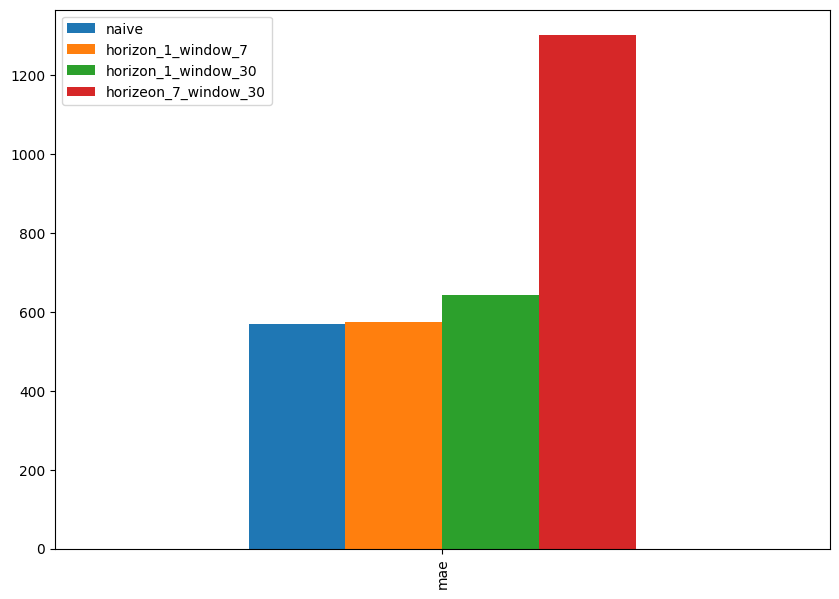

In [81]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizeon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D

In [82]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [83]:
# Create windowwed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [84]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_windows)

(2229, 551, 2229, 551)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However, our data isn't in that shape yet...

In [85]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [86]:
# Befroe we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [88]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [89]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [90]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 656.4321


656.4320678710938

In [92]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.0104


577.0103759765625

In [93]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8737.137, 8680.352, 8546.265, 8461.267, 8515.177, 8284.254,
       8131.841, 8065.989, 7709.757, 7337.352], dtype=float32)>

In [94]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 577.0104,
 'mse': 1204810.9,
 'rmse': 1097.6388,
 'mape': 2.577761,
 'mase': 1.007085}

In [95]:
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

## Model 5: RNN (LSTM)


In [96]:
tf.random.set_seed(42)

# Let's build an LSTM model with Functional 
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
18/18 [==============================] - 6s 163ms/step - loss: 2067.3108 - val_loss: 6405.7290
Epoch 2/100
18/18 [==============================] - 5s 286ms/step - loss: 456.9462 - val_loss: 1677.1549
Epoch 3/100
18/18 [==============================] - 3s 185ms/step - loss: 221.0399 - val_loss: 1167.1356
Epoch 4/100
18/18 [==============================] - 2s 136ms/step - loss: 200.5463 - val_loss: 1146.7552
Epoch 5/100
18/18 [==============================] - 2s 116ms/step - loss: 196.6110 - val_loss: 1112.2347
Epoch 6/100
18/18 [==============================] - 2s 128ms/step - loss: 194.5418 - val_loss: 1091.4956
Epoch 7/100
18/18 [==============================] - 0s 15ms/step - loss: 193.7944 - val_loss: 1099.6105
Epoch 8/100
18/18 [==============================] - 0s 15ms/step - loss: 190.5574 - val_loss: 1113.2051
Epoch 9/100
18/18 [==============================] - 0s 16ms/step - loss: 189.1472 - val_loss: 1147.7615
Epoch 10/100
18/18 [============================

In [97]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 587.0726


587.0726318359375

In [98]:
# Make prediction with out LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8686.69  , 8668.68  , 8539.589 , 8433.023 , 8488.802 , 8267.236 ,
       8125.13  , 8026.0146, 7707.341 , 7366.009 ], dtype=float32)>

In [99]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 587.0726,
 'mse': 1223026.4,
 'rmse': 1105.9053,
 'mape': 2.6512191,
 'mase': 1.024647}

In [100]:
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

## Make a multivariate time series dataset

Before we add a fature to our time seires, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...
* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

In [101]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [102]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [103]:
# Create date ranges of where specific block_reward values should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days 

(1012, 2421)

In [104]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [105]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [106]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


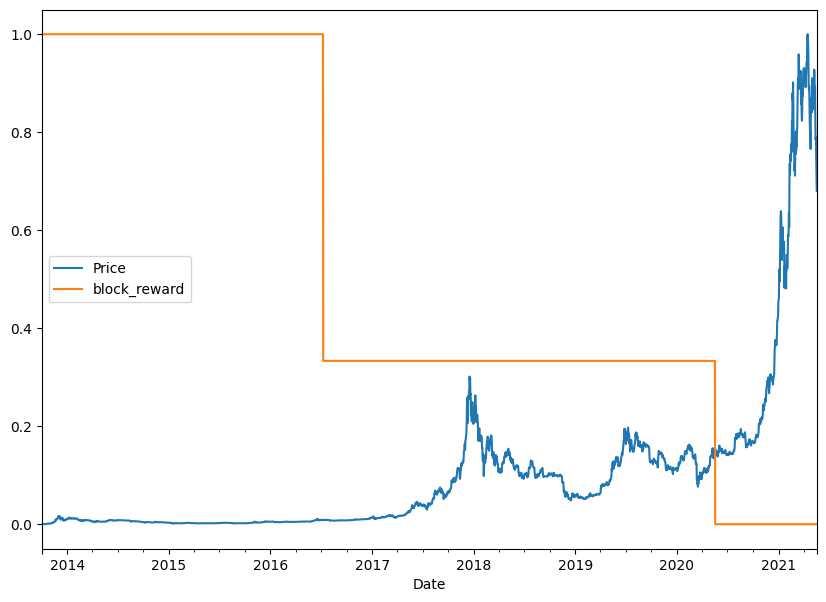

In [107]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.  

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.


In [108]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [109]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7 block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8 block_reward] -> [9]
```

In [110]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [111]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [112]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# compile 
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 775.0016 

18/18 [==============================] - 5s 94ms/step - loss: 775.0016 - val_loss: 2139.1006
Epoch 2/100
 7/18 [==========>...................] - ETA: 0s - loss: 242.4501

18/18 [==============================] - 1s 58ms/step - loss: 238.3023 - val_loss: 1135.3062
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 188.5504

18/18 [==============================] - 1s 60ms/step - loss: 183.1173 - val_loss: 997.7761
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 217.3090

18/18 [==============================] - 1s 39ms/step - loss: 169.1915 - val_loss: 975.2897
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9693

18/18 [==============================] - 1s 58ms/step - loss: 160.7538 - val_loss: 872.7560
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 155.8646 - val_loss: 923.7429
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 157.1235

18/18 [==============================] - 1s 36ms/step - loss: 150.8431 - val_loss: 801.4978
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 144.3638

18/18 [==============================] - 1s 62ms/step - loss: 144.8700 - val_loss: 789.2408
Epoch 9/100
14/18 [======================>.......] - ETA: 0s - loss: 141.4565

18/18 [==============================] - 1s 48ms/step - loss: 144.4158 - val_loss: 757.6656
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 137.2332

18/18 [==============================] - 2s 88ms/step - loss: 137.7606 - val_loss: 738.1741
Epoch 11/100
18/18 [==============================] - 0s 13ms/step - loss: 133.0422 - val_loss: 744.2671
Epoch 12/100
18/18 [==============================] - 0s 17ms/step - loss: 129.7714 - val_loss: 795.8032
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 133.5372

18/18 [==============================] - 3s 167ms/step - loss: 133.2356 - val_loss: 717.4963
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 123.9474

18/18 [==============================] - 2s 113ms/step - loss: 126.8474 - val_loss: 696.4000
Epoch 15/100
 8/18 [============>.................] - ETA: 0s - loss: 131.8729

18/18 [==============================] - 1s 66ms/step - loss: 129.4021 - val_loss: 690.4474
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 123.5156 - val_loss: 727.1112
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 125.1412

18/18 [==============================] - 1s 52ms/step - loss: 119.9778 - val_loss: 680.0948
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 122.2582

18/18 [==============================] - 1s 49ms/step - loss: 117.9022 - val_loss: 640.9393
Epoch 19/100
18/18 [==============================] - 0s 12ms/step - loss: 117.8410 - val_loss: 664.3623
Epoch 20/100
18/18 [==============================] - 0s 10ms/step - loss: 116.2100 - val_loss: 642.8547
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 119.4964

18/18 [==============================] - 1s 53ms/step - loss: 119.1087 - val_loss: 620.3994
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7601 - val_loss: 637.9960
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 119.5459 - val_loss: 630.9964
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 119.7378

18/18 [==============================] - 1s 56ms/step - loss: 116.8690 - val_loss: 612.6664
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 117.3663

18/18 [==============================] - 1s 50ms/step - loss: 114.4605 - val_loss: 603.9532
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 115.1011

18/18 [==============================] - 1s 77ms/step - loss: 113.4564 - val_loss: 598.6196
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 118.6009

18/18 [==============================] - 2s 141ms/step - loss: 114.4863 - val_loss: 595.6553
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 110.9752

18/18 [==============================] - 1s 69ms/step - loss: 110.9752 - val_loss: 592.3453
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 110.4496 - val_loss: 593.7065
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 114.9604

18/18 [==============================] - 1s 60ms/step - loss: 115.2206 - val_loss: 589.2241
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1163 - val_loss: 612.9154
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8583 - val_loss: 602.6653
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9269 - val_loss: 607.2203
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 109.8762 - val_loss: 614.7839
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 112.8765

18/18 [==============================] - 1s 36ms/step - loss: 109.2072 - val_loss: 583.8288
Epoch 36/100
18/18 [==============================] - 0s 12ms/step - loss: 113.4193 - val_loss: 585.5281
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4557 - val_loss: 589.0145
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4112 - val_loss: 598.7067
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 113.9563

18/18 [==============================] - 1s 55ms/step - loss: 112.7403 - val_loss: 576.7724
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1199 - val_loss: 617.4619
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 109.1969 - val_loss: 581.6574
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4825 - val_loss: 626.2353
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7244 - val_loss: 666.6287
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 121.1827 - val_loss: 636.1709
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 106.9468

18/18 [==============================] - 1s 48ms/step - loss: 108.1258 - val_loss: 574.8512
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 113.4353

18/18 [==============================] - 1s 48ms/step - loss: 109.4137 - val_loss: 571.0180
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0786 - val_loss: 645.3434
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6008 - val_loss: 577.8960
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5054 - val_loss: 587.3715
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6931 - val_loss: 642.0373
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 109.9149 - val_loss: 578.9869
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 109.6380 - val_loss: 582.4860
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7157 - val_loss: 617.4078
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6439 - val_loss: 575.5339
Epoch 55/100
18/18 [==============================] - 0s 8ms/step - loss: 11

18/18 [==============================] - 1s 70ms/step - loss: 113.0349 - val_loss: 568.7843
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 106.5188 - val_loss: 598.3167
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 110.1450 - val_loss: 636.9279
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 107.9905 - val_loss: 570.7568
Epoch 62/100
18/18 [==============================] - 0s 11ms/step - loss: 108.2627 - val_loss: 583.3461
Epoch 63/100
18/18 [==============================] - 0s 12ms/step - loss: 111.0641 - val_loss: 618.4401
Epoch 64/100
18/18 [==============================] - 0s 12ms/step - loss: 109.6133 - val_loss: 593.3470
Epoch 65/100
18/18 [==============================] - 0s 13ms/step - loss: 108.6935 - val_loss: 575.4436
Epoch 66/100
18/18 [==============================] - 0s 14ms/step - loss: 106.4790 - val_loss: 571.9891
Epoch 67/100
18/18 [==============================] - 0s 22ms/step - l

18/18 [==============================] - 2s 105ms/step - loss: 122.2047 - val_loss: 567.5732
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 133.9542 - val_loss: 649.5982
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5031 - val_loss: 584.0101
Epoch 72/100
 8/18 [============>.................] - ETA: 0s - loss: 105.3315

18/18 [==============================] - 1s 47ms/step - loss: 107.6615 - val_loss: 565.2742
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 112.1316 - val_loss: 651.7117
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 106.5809 - val_loss: 575.8432
Epoch 75/100
12/18 [===================>..........] - ETA: 0s - loss: 105.8223

18/18 [==============================] - 1s 62ms/step - loss: 106.3722 - val_loss: 564.4996
Epoch 76/100
18/18 [==============================] - 0s 10ms/step - loss: 107.3228 - val_loss: 566.6961
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 107.0801 - val_loss: 570.5880
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 106.4622 - val_loss: 567.6678
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 105.8140 - val_loss: 603.1680
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 108.9117 - val_loss: 571.2997
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 105.0686 - val_loss: 575.6149
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0200 - val_loss: 567.4721
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8327 - val_loss: 657.1819
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 

18/18 [==============================] - 1s 61ms/step - loss: 106.2620 - val_loss: 563.6929
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7811 - val_loss: 681.2411


In [113]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 681.2411


681.2411499023438

In [114]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 563.6928


563.6928100585938

In [115]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8834.132, 8769.917, 9039.97 , 8763.771, 8726.921, 8737.304,
       8670.204, 8507.853, 8457.028, 8521.908], dtype=float32)>

In [116]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 563.6928,
 'mse': 1154776.1,
 'rmse': 1074.6051,
 'mape': 2.511683,
 'mase': 0.99025214}

In [117]:
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

In [118]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-Beats algorithm

Let's now try building the bigest time series forecasting model we've built so fat.

More specifically, we're going to be replicating Figure 1 in the algorithm in the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practive replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem.

### Building and testing the N-BEATS block layer

Because the N-BEATsS block layer doesn't exist in Tensorflow, we've got to create it.

To create custom layers and models in TensorFlow, we cab use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [119]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int, 
               **kwargs):  # argument takes care of all the arguments for the parent class (class and inputs not named at the top)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers that each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do so we'll make some dummy inputs and outputs

In [120]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcase + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [121]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [122]:
# Pass dummy inputs to dummy NBeatsBlock
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.87736946 -0.59175164  0.19352841  0.3088072   0.41552776 -0.14606206
 -0.11448401]
Forecast: 0.0016325563192367554


 ### Preparing data from the N-Beats algorithm using tf.data

 To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [123]:
HORIZON = 1
WINDOW_SIZE = 7

In [124]:
# create NBEATs data inputs (N-Beats works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [125]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [126]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)
                                    

(2224, 556, 2224, 556)

In [127]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [128]:
# Values from N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting Ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its depper architecture (section 3.2 of N-Beats paper)

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [129]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N_BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layer
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts 
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-Beats paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [130]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in step 3

  # 5. Use the NBeatsBlcok to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast + block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="Model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and Reduct LROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])



Epoch 971: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1071: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 4min 55s, sys: 6.13 s, total: 5min 1s
Wall time: 6min 41s


In [131]:
# Evaluate NBEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 574.4734


574.473388671875

In [132]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8878.18 , 8782.215, 9037.626, 8791.195, 8733.057, 8757.141,
       8694.888, 8513.288, 8478.604, 8529.756], dtype=float32)>

In [133]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 574.4734,
 'mse': 1188114.1,
 'rmse': 1090.0065,
 'mape': 2.5997455,
 'mase': 1.0091907}

### Plotting the N-BEATS architecture we've created

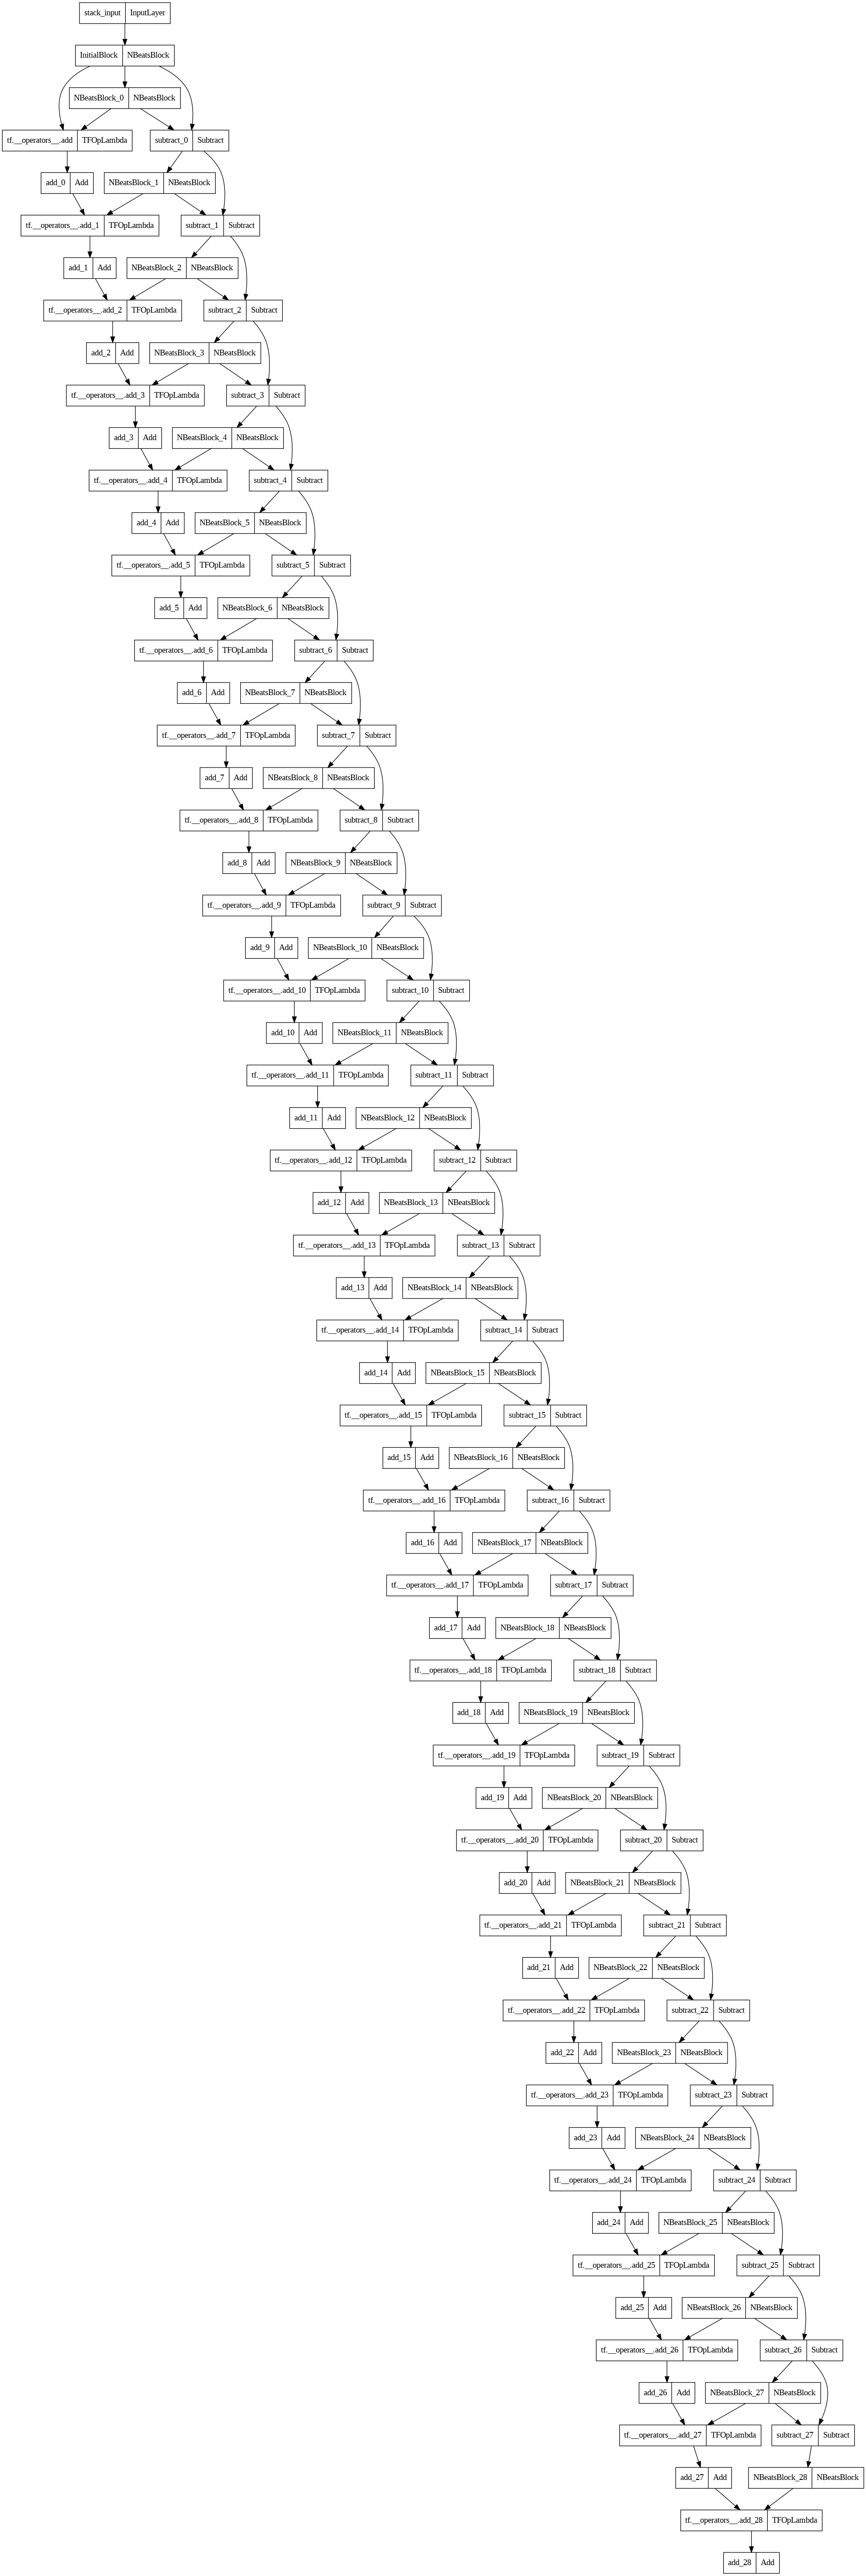

In [134]:
# Plot the N-BEATS modela and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

AN ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [135]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [136]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.
  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

    return ensemble_models

In [137]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)


Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 879: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 376: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 476: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 218: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 333: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 433: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 1min 19s, sys: 5.3 s, total: 1min 24s
Wall time: 1min 27s


## Make predictions with our ensemble model

In [138]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [139]:
# Create a list of ensemble predicitons
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step
CPU times: user 149 ms, sys: 11 ms, total: 160 ms
Wall time: 183 ms


In [140]:
ensemble_preds

<tf.Tensor: shape=(3, 556), dtype=float32, numpy=
array([[ 8780.34 ,  8749.242,  9062.396, ..., 50011.566, 48576.184,
        46373.707],
       [ 8727.842,  8761.608,  9064.805, ..., 49828.71 , 48101.086,
        45975.164],
       [ 8763.026,  8737.953,  9053.701, ..., 50388.867, 48074.715,
        46034.344]], dtype=float32)>

In [141]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                            y_pred=ensemble_preds)
ensemble_results

{'mae': 572.1037,
 'mse': 1155347.0,
 'rmse': 1074.8507,
 'mape': 2.6092865,
 'mase': 1.0050277}

In [142]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8757.069 ,  8749.602 ,  9060.301 ,  8703.482 ,  8749.923 ,
        8719.921 ,  8630.093 ,  8464.963 ,  8445.444 ,  8507.491 ,
        8183.772 ,  8089.225 ,  8042.5703,  7596.0415,  7280.5366,
        7306.293 ,  7063.225 ,  7213.3257,  7163.4956,  7521.0806,
        7407.4517,  7712.068 ,  7591.2515,  7383.4155,  7294.457 ,
        7290.5664,  7193.4995,  7383.168 ,  7504.3228,  7530.2993,
        7550.3555,  7332.9214,  7201.279 ,  7163.203 ,  7168.364 ,
        7222.1035,  7080.6577,  7084.9976,  6851.908 ,  6555.799 ,
        7405.8613,  7174.787 ,  7103.2837,  7257.5747,  7263.5405,
        7168.627 ,  7215.021 ,  7193.5757,  7160.8726,  7203.5737,
        7293.9556,  7375.892 ,  7242.738 ,  7151.44  ,  7143.9272,
        6924.3403,  7266.475 ,  7336.9146,  7344.3984,  7700.2637,
        8067.111 ,  8162.7886,  7880.318 ,  8096.3594,  8131.8774,
        8152.3237,  8106.7593,  8739.423 ,  8902.474 ,  8768.1045,
        8946.3

In [143]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8763.026 ,  8749.242 ,  9062.396 ,  8710.049 ,  8747.928 ,
        8711.075 ,  8622.046 ,  8466.159 ,  8439.597 ,  8507.443 ,
        8187.273 ,  8091.6616,  8044.2983,  7589.882 ,  7264.076 ,
        7308.3853,  7048.149 ,  7221.331 ,  7174.854 ,  7526.404 ,
        7404.785 ,  7708.498 ,  7571.8496,  7381.2236,  7295.997 ,
        7289.33  ,  7191.426 ,  7383.212 ,  7510.248 ,  7525.387 ,
        7542.9717,  7342.2188,  7203.0156,  7163.542 ,  7169.844 ,
        7220.1533,  7085.533 ,  7084.628 ,  6846.4985,  6553.8726,
        7398.9243,  7150.674 ,  7104.4487,  7257.9976,  7269.83  ,
        7166.8096,  7219.911 ,  7199.344 ,  7151.717 ,  7205.155 ,
        7298.664 ,  7383.0938,  7236.6035,  7154.7593,  7150.96  ,
        6927.6807,  7261.418 ,  7350.42  ,  7335.196 ,  7694.171 ,
        8061.523 ,  8161.7915,  7871.418 ,  8097.334 ,  8147.4355,
        8165.1587,  8102.956 ,  8737.498 ,  8908.667 ,  8774.755 ,
        8951.359 ,  8997.033 ,  8627.331 ,  8607.402 ,  8679.5

In [144]:
# Evaluate ensemble model predictions (using mean)
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 567.2344,
 'mse': 1144252.4,
 'rmse': 1069.6974,
 'mape': 2.5842035,
 'mase': 0.99647367}

In [145]:
# Evaluate ensemble model predictions (using median)
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 567.38916,
 'mse': 1146898.9,
 'rmse': 1070.9336,
 'mape': 2.59651,
 'mase': 0.9967456}

Our ensemble preds come out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiple the standard deviation by 1.96 (assumuning the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [146]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [147]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8714.259 ,  8730.667 ,  9050.953 ,  8679.926 ,  8714.64  ,
         8668.67  ,  8597.8955,  8453.256 ,  8427.282 ,  8496.428 ,
         8163.5493,  8082.07  ,  8010.207 ,  7567.48  ,  7218.795 ,
         7270.7905,  7013.9253,  7165.266 ,  7108.6577,  7495.2456,
         7342.205 ,  7696.9194,  7534.0923,  7360.03  ,  7267.5723,
         7263.7837,  7173.1064,  7366.561 ,  7476.4023,  7477.835 ,
         7497.0356,  7292.213 ,  7182.718 ,  7159.261 ,  7161.7656,
         7212.889 ,  7051.9707,  7081.693 ,  6827.2515,  6544.062 ,
         7356.472 ,  7079.3413,  7058.682 ,  7140.8613,  7173.087 ,
         7111.767 ,  7196.1836,  7155.216 ,  7133.0576,  7190.63  ,
         7267.2812,  7337.0283,  7184.7715,  7124.6226,  7123.3677,
         6911.1616,  7235.278 ,  7295.0996,  7295.959 ,  7659.002 ,
         8035.094 ,  8133.4824,  7838.7856,  8083.4873,  8082.9307,
         8100.7236,  8042.967 ,  8713.385 ,  8875.751 ,  8711.774 ,

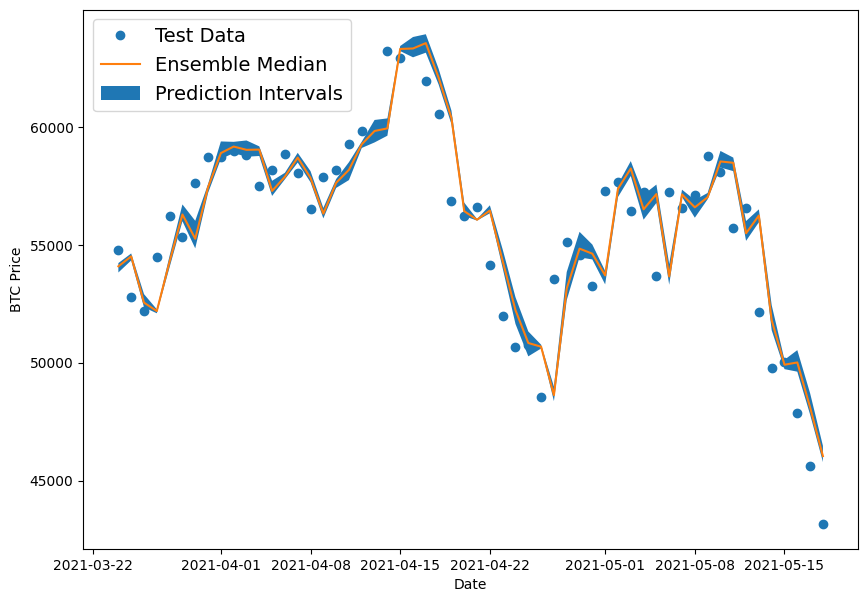

In [148]:
# Get the mdedian/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "o", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

So far all of our models predictions have been lagging behind the test data...

As if they're replicating what the naive model does and just predict the previous timestep as the next timestep

**Note:** These prediction intervals are estimates theselves.  And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncerainty** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty.
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

## Model 9: Train a model on the full historial data to make predictions into the future

SO far all of our models have predicted on the test dataset, however, this is only a psudofuture.

Let's now build a model which is capable of predicting into the future!

In [149]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [150]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [151]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [152]:
X_all[:10], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [153]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [154]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forescasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0,
            )

### Make predictions into future

In [155]:
# How many timestamps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the ame kind of data it was trained on
2. Creates an empty list for future forecasts (this willl be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times makeing a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest predicitons

In [156]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted one each
  for _ in range(INTO_FUTURE):
    # Predict on the last windown then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [157]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 67ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55292.921875

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55292.921875  ] -> Prediction: 50876.05859375

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55292.921875   50876.05859375] -> Prediction: 48315.81640625

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55292.921875   50876.05859375 48315.81640625] -> Prediction: 49525.43359375

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55292.921875
 50876.05859375 48315.81640625 49525.43359375] 

### Plot future forecasts

In [158]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [159]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [160]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [161]:
# Insert last timestep/final price into next time steps and future forecast to connect
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55292.92 , 50876.06 , 48315.816, 49525.434, 48276.8  ,
        45580.914, 47047.68 , 53916.234, 49528.227, 47840.582, 49588.715,
        48286.29 , 46268.082, 49161.586], dtype=float32))

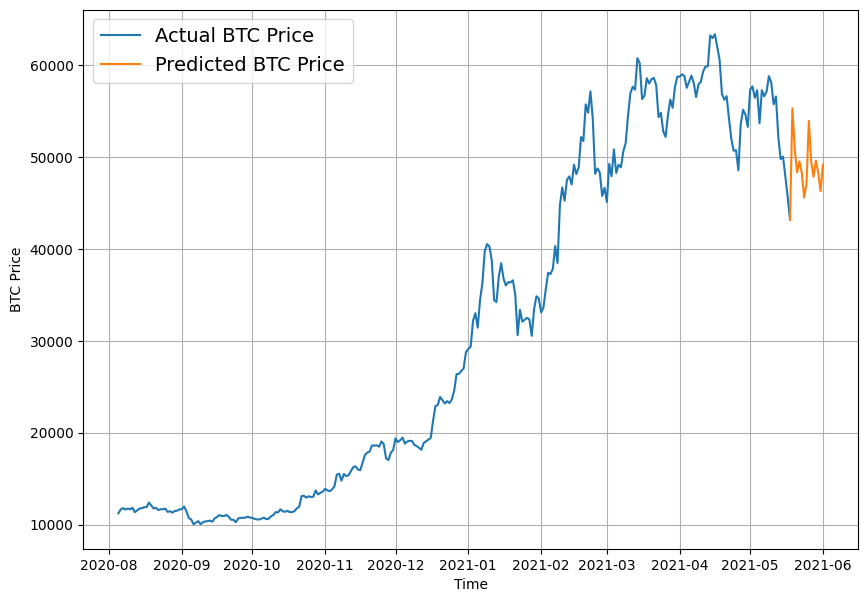

In [162]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem)

In [163]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [164]:
# Manufactor an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [165]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

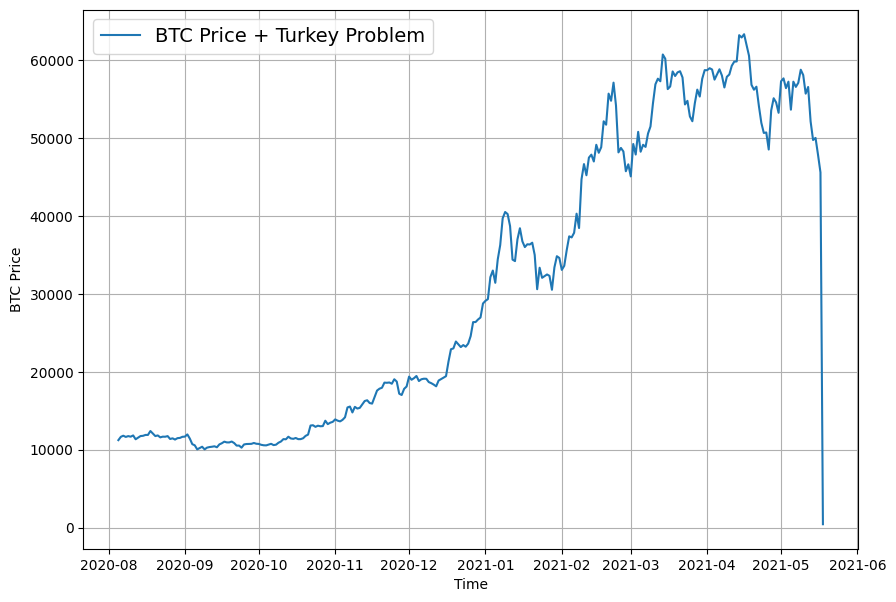

In [166]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [167]:
# Create train and test sets for turkey data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Build a turkey model (model to predict on turkey)

In [169]:
# Clone model 1 archeitecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                      optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [170]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 803.5553


803.5552978515625

In [171]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.0316


647.0315551757812

In [172]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8827.841, 8739.043, 9032.187, 8776.908, 8697.029, 8736.86 ,
       8671.743, 8495.435, 8438.799, 8518.473], dtype=float32)>

In [173]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17131.05,
 'mse': 614519700.0,
 'rmse': 23716.676,
 'mape': 121.37804,
 'mase': 26.510357}

In [174]:
model_1_results

{'mae': 573.2643,
 'mse': 1170900.5,
 'rmse': 1082.0815,
 'mape': 2.5547225,
 'mase': 1.0005467}

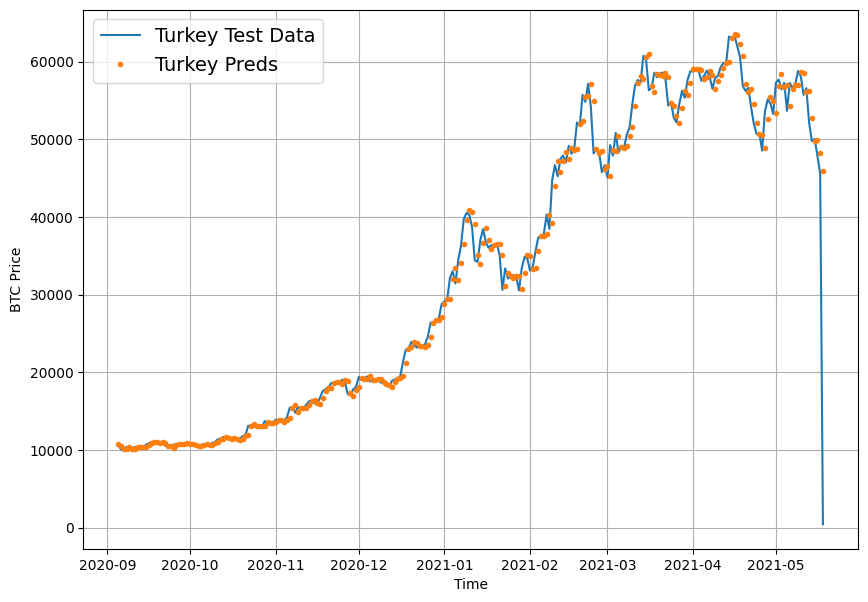

In [175]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

### Compare models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({ "naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": mode1_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_reults,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": model_8_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

In [ ]:
# Sort model results results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");